<a href="https://colab.research.google.com/github/benasphy/Deep-Learning/blob/main/Vanishing_gradient_problem%20and%20xavier_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

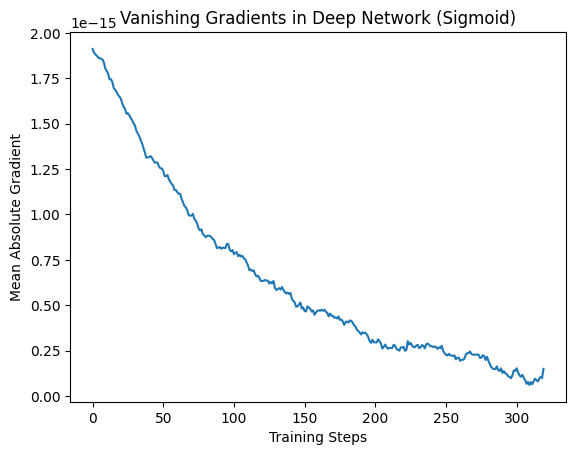

In [8]:
#Demonstrating Vanishing Gradient Problem

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x_train = np.random.rand(1000, 10)  # 1000 samples, 10 features
y_train = np.random.randint(0, 2, size=(1000, 1))  # Binary labels

# Create a deep neural network with sigmoid activation
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='sigmoid'))  # Input layer
    for _ in range(20):  # Add 20 hidden layers
        model.add(Dense(10, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    return model

# Compile the model
model = create_model()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callback to track gradients during training
class GradientCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.layer_gradients = []

    def on_batch_end(self, batch, logs=None):
        # Compute gradients for the first hidden layer
        with tf.GradientTape() as tape:
            # The change is here. Passing x_train as input instead of self.model.input
            outputs = self.model(x_train)
            loss = self.model.compiled_loss(y_train, outputs)
        gradients = tape.gradient(loss, self.model.trainable_weights[1])  # Weights of the first hidden layer
        mean_gradient = tf.reduce_mean(tf.abs(gradients)).numpy()
        self.layer_gradients.append(mean_gradient)

gradient_callback = GradientCallback()

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, callbacks=[gradient_callback], verbose=0)

# Plot the gradients
plt.plot(gradient_callback.layer_gradients)
plt.title("Vanishing Gradients in Deep Network (Sigmoid)")
plt.xlabel("Training Steps")
plt.ylabel("Mean Absolute Gradient")
plt.show()

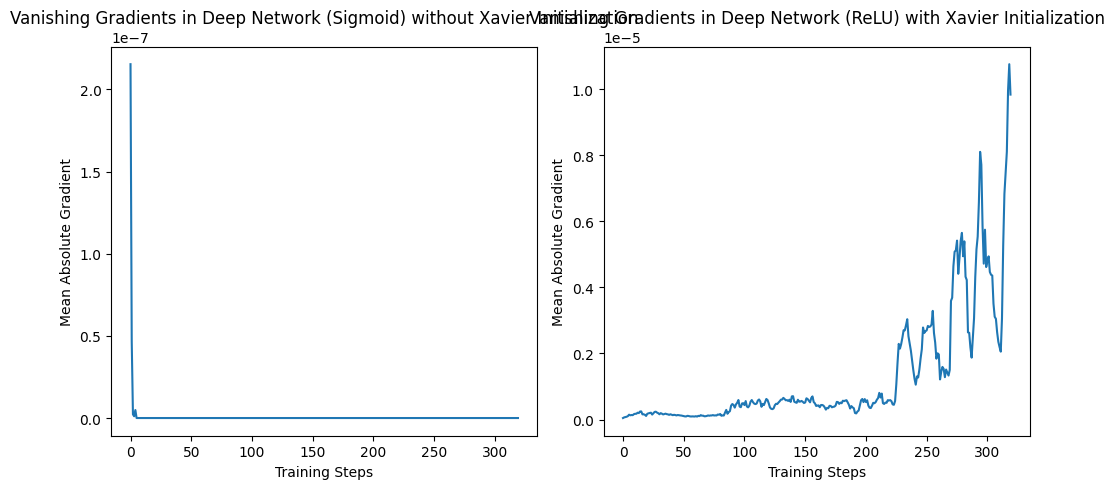

In [7]:
#Updated Code with Xavier Initialization, ReLU Activation and Adam Optimizer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import GlorotUniform
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x_train = np.random.rand(1000, 10)  # 1000 samples, 10 features
y_train = np.random.randint(0, 2, size=(1000, 1))  # Binary labels

# Create a deep neural network with ReLU activation and Xavier initialization
def create_model_xavier_relu():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='relu', kernel_initializer=GlorotUniform()))  # Input layer
    for _ in range(20):  # Add 20 hidden layers
        model.add(Dense(10, activation='relu', kernel_initializer=GlorotUniform()))
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    return model

# Compile the model with Xavier initialization and Adam optimizer
model_xavier_relu = create_model_xavier_relu()
model_xavier_relu.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

# Callback to track gradients during training
class GradientCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.layer_gradients = []

    def on_batch_end(self, batch, logs=None):
        # Compute gradients for the first hidden layer
        with tf.GradientTape() as tape:
            outputs = self.model(x_train)
            loss = self.model.compiled_loss(y_train, outputs)
        gradients = tape.gradient(loss, self.model.trainable_weights[1])  # Weights of the first hidden layer
        mean_gradient = tf.reduce_mean(tf.abs(gradients)).numpy()
        self.layer_gradients.append(mean_gradient)

gradient_callback = GradientCallback()

# Train the model with Xavier initialization and ReLU
history_xavier_relu = model_xavier_relu.fit(x_train, y_train, epochs=10, batch_size=32, callbacks=[gradient_callback], verbose=0)

# Plot the gradients for Xavier initialization with ReLU
plt.figure(figsize=(10, 5))

# Plot gradients for the original model
plt.subplot(1, 2, 1)
plt.plot(gradient_callback.layer_gradients)
plt.title("Vanishing Gradients in Deep Network (Sigmoid) without Xavier Initialization")
plt.xlabel("Training Steps")
plt.ylabel("Mean Absolute Gradient")

# Reset the callback for the model with Xavier initialization and ReLU
gradient_callback.layer_gradients.clear()

# Train the original model without Xavier initialization and ReLU activation
model_original = create_model_xavier_relu()  # Same structure but no Xavier init or ReLU
model_original.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

history_original = model_original.fit(x_train, y_train, epochs=10, batch_size=32, callbacks=[gradient_callback], verbose=0)

# Plot gradients for the original model with ReLU activation
plt.subplot(1, 2, 2)
plt.plot(gradient_callback.layer_gradients)
plt.title("Vanishing Gradients in Deep Network (ReLU) with Xavier Initialization")
plt.xlabel("Training Steps")
plt.ylabel("Mean Absolute Gradient")

plt.tight_layout()
plt.show()
